In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source,  and generation_data_source are Object type data which might needs to change to Int

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source and estimated_generation_gwh has Null Values more than 50% of the entire data hence filling those null values can make the whole model biased and incorrect hence dropping those cloumns.

In [6]:
df = df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'],axis=1)

In [7]:
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [8]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [9]:
df['geolocation_source'].mode()

0    WRI
dtype: object

Filling NaN in geolocation_source column with Mode i.e 'WRI'

In [10]:
df['geolocation_source'] = df['geolocation_source'].fillna('WRI')

In [11]:
df.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [12]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI


Data looks fine to encode into Int

In [13]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [14]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,43.847850,94.469680,1.733186
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,44.642818,70.381222,0.677151
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,22.000000,58.000000,2.000000
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,22.000000,58.000000,2.000000
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,29.500000,115.500000,2.000000
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,190.000000,303.000000,2.000000


- Country and country_long column does not have any other value than India
- name, gppd_idnr and url are the unique identifiers that does not contributes to Output 

In [15]:
df = df.drop(['country', 'country_long', 'name', 'gppd_idnr', 'url'],axis=True)

Dropping 'country', 'country_long', 'name', 'gppd_idnr' and 'url' these columns since they does not contributes to the Ouput

In [16]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

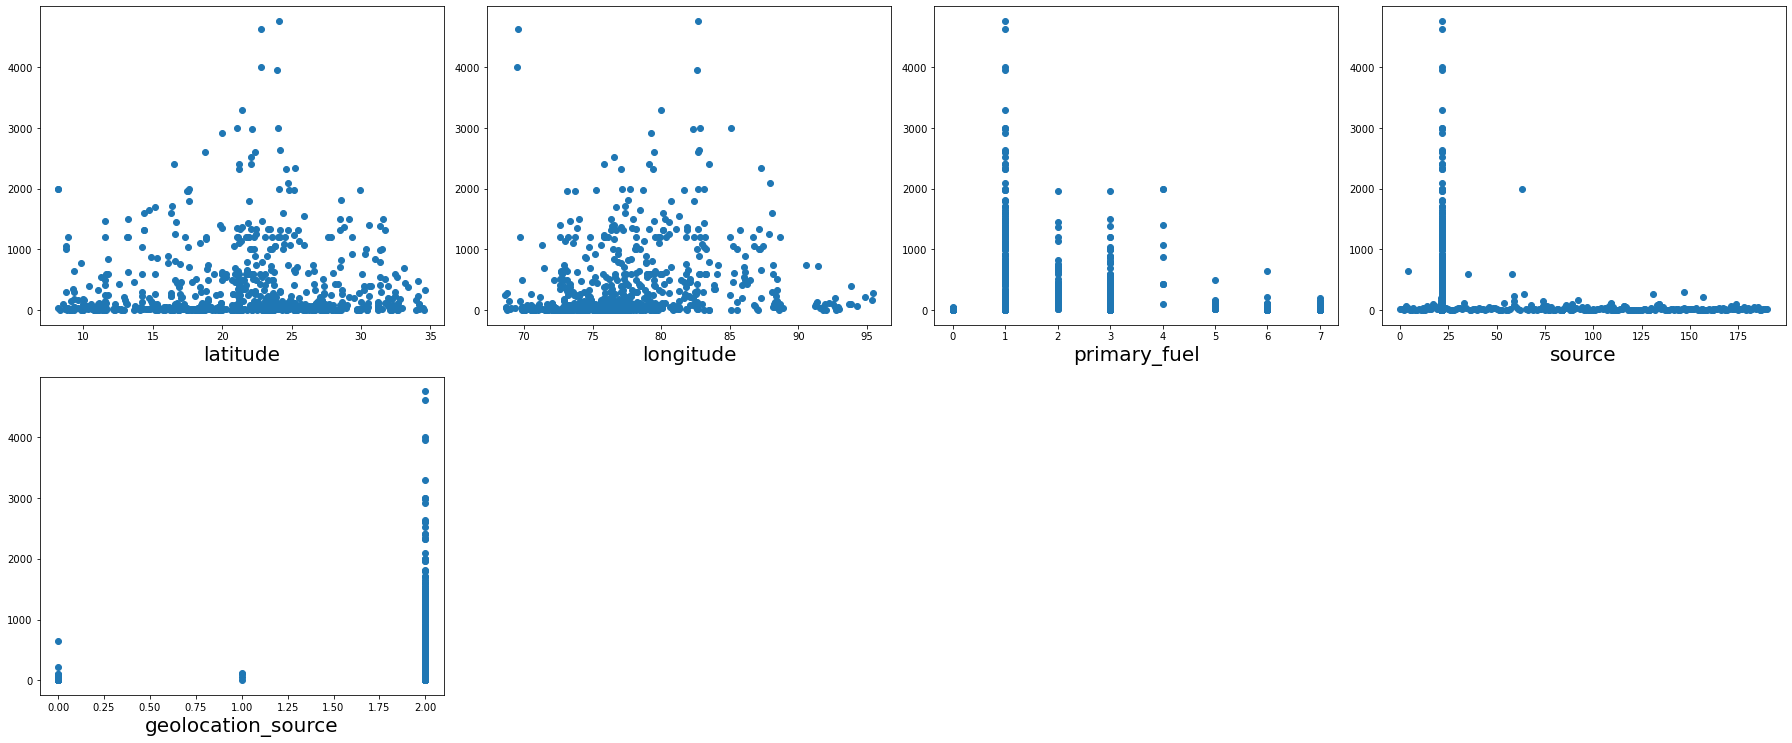

In [17]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Other than primary_fuel and geolocation_source every columns have less relationship with capacity_mw

In [18]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
dtype: float64

longitude, source and geolocation_source has skewness

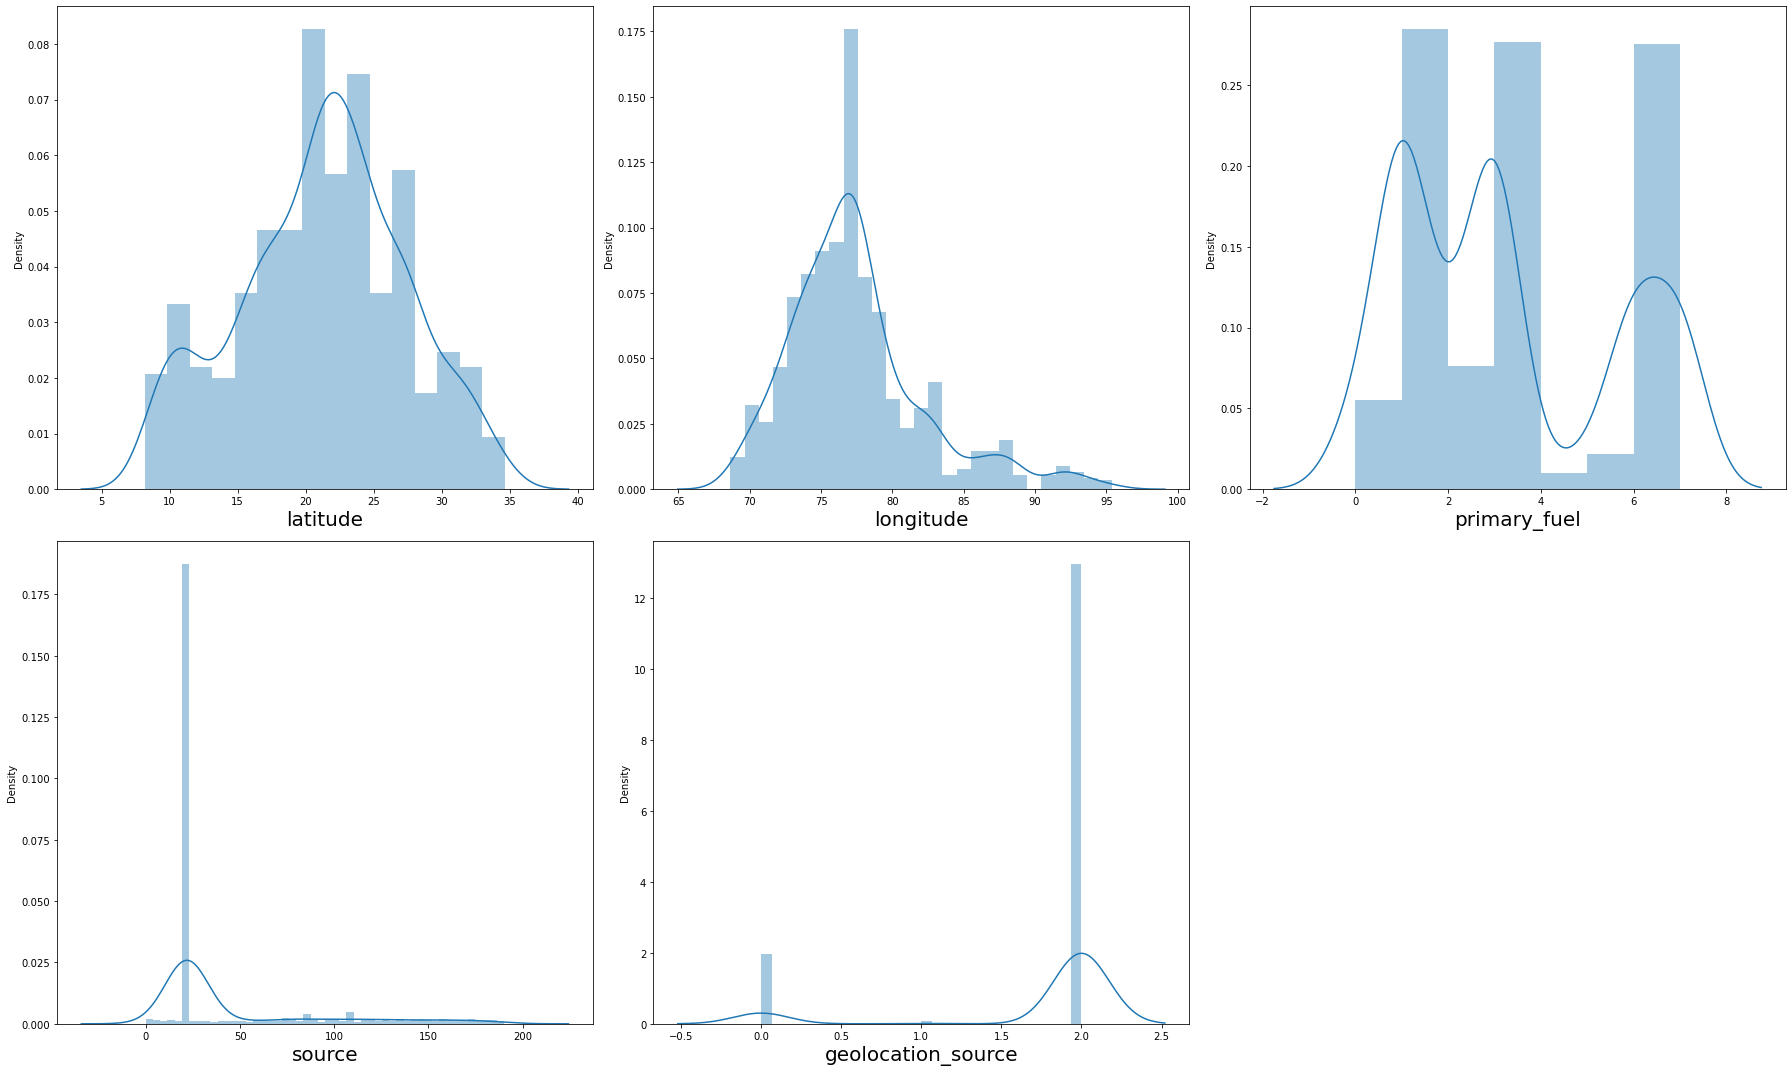

In [19]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

longitude, source and geolocation_source has skewness and can have outliers 

In [20]:
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw)

latitude              0.050984
longitude             0.195882
primary_fuel         -0.380395
source               -0.242122
geolocation_source    0.204865
dtype: float64

latitude have less corelation with label

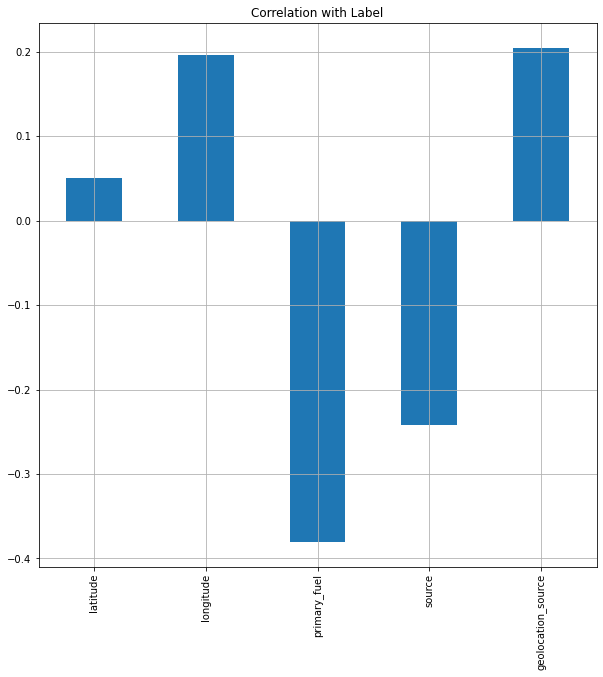

In [21]:
df.drop('capacity_mw',axis=1).corrwith(df.capacity_mw).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

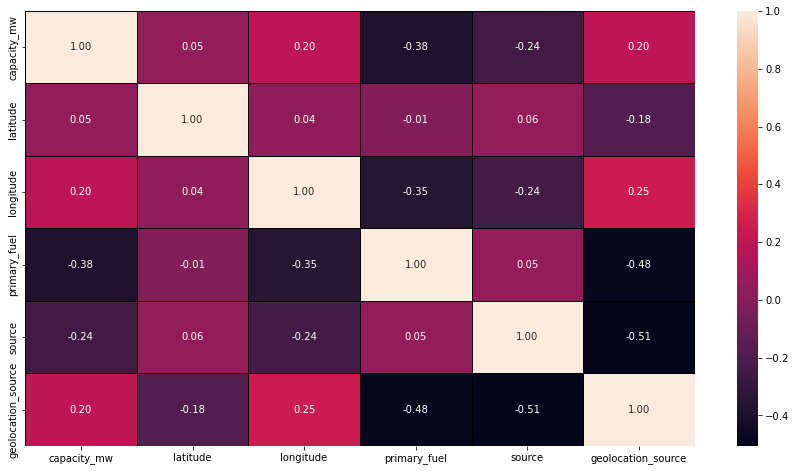

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [23]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source'],
      dtype='object')

In [24]:
x = df[['latitude', 'longitude', 'primary_fuel', 'source', 'geolocation_source']]

In [25]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [26]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [27]:
vif

,Features,VIF
0,latitude,13.389151
1,longitude,41.121843
2,primary_fuel,3.508285
3,source,2.521945
4,geolocation_source,13.314546


In [28]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,6.0,109.0,1.0
1,98.0,24.7663,74.6090,1.0,174.0,2.0
2,39.2,21.9038,69.3732,7.0,21.0,2.0
3,135.0,23.8712,91.3602,2.0,22.0,2.0
4,1800.0,21.9603,82.4091,1.0,22.0,2.0


In [29]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,43.847850,1.733186
std,590.085456,6.079148,4.812291,2.280652,44.642818,0.677151
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,22.000000,2.000000
50%,59.200000,21.281800,76.979200,3.000000,22.000000,2.000000
75%,385.250000,25.176450,79.206100,6.000000,29.500000,2.000000
max,4760.000000,34.649000,95.408000,7.000000,190.000000,2.000000


Database is ready to remove outliers if exist 

In [30]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

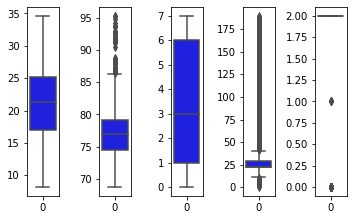

In [31]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in longitude, source and geolocation_source

In [32]:
df['geolocation_source'].value_counts()

2.0    784
0.0    119
1.0      4
Name: geolocation_source, dtype: int64

Not removing Outliers from classification columns i.e geolocation_source

In [33]:
old_data = (df.shape)[0]

In [34]:
q1 = df['longitude'].quantile(0.25)
q3 = df['longitude'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['longitude'] > (q3+1.5*iqr))
lower = np.where(df['longitude'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from longitude column

In [35]:
q1 = df['source'].quantile(0.25)
q3 = df['source'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['source'] > (q3+1.5*iqr))
lower = np.where(df['source'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from source column

In [36]:
new_data = (df.shape)[0]

In [37]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 238 no. of Data


In [38]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

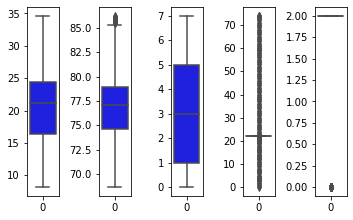

In [39]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

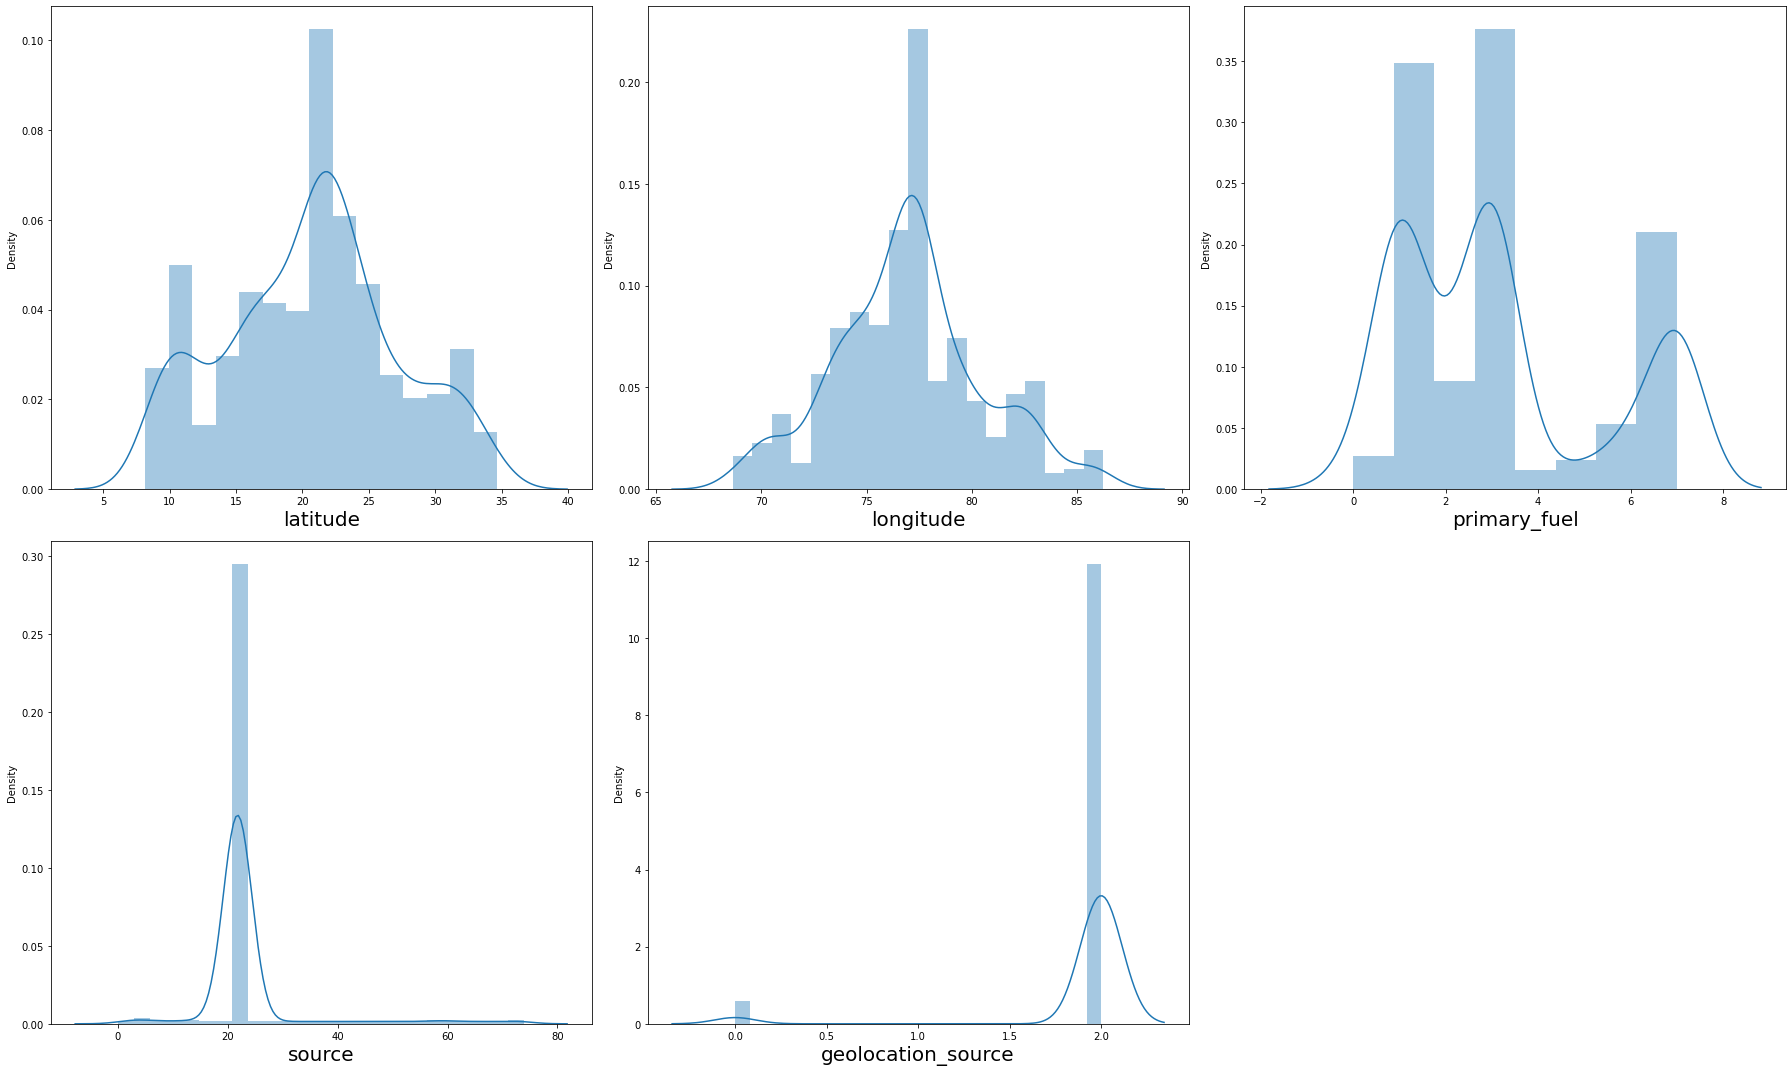

In [40]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [41]:
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[['source']] = scaler.fit_transform(df[['source']].values)

In [43]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

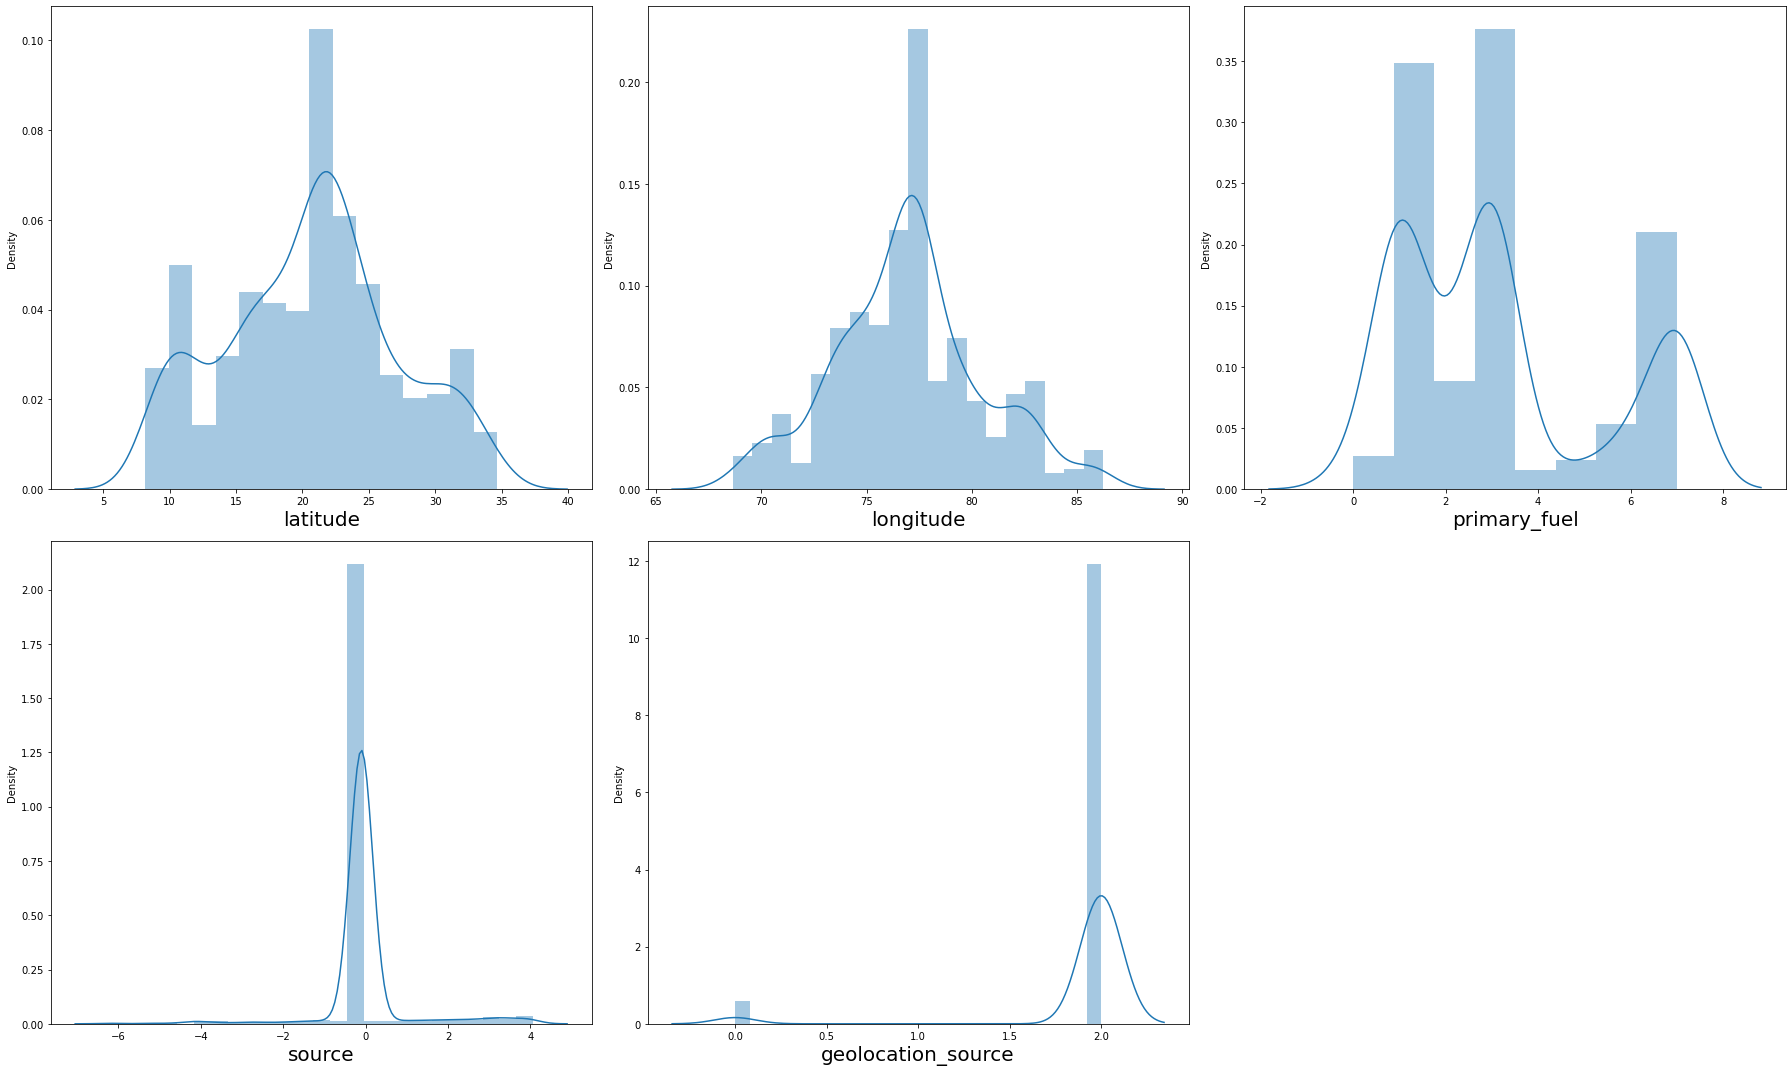

In [44]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [45]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

In [46]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [47]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.19893587258233436
At Random state 0 the testing accuracy is :- 0.15092590787619897


At Random state 1 the training accuracy is :- 0.22342261943765873
At Random state 1 the testing accuracy is :- 0.10885482275973324


At Random state 2 the training accuracy is :- 0.18986341495066605
At Random state 2 the testing accuracy is :- 0.20440944032618202


At Random state 3 the training accuracy is :- 0.20211351628273377
At Random state 3 the testing accuracy is :- 0.11757747148516362


At Random state 4 the training accuracy is :- 0.20003907435682566
At Random state 4 the testing accuracy is :- 0.17623745759455622


At Random state 5 the training accuracy is :- 0.19626714426477854
At Random state 5 the testing accuracy is :- 0.1877170111681945


At Random state 6 the training accuracy is :- 0.2072947532271311
At Random state 6 the testing accuracy is :- 0.16432611641497563


At Random state 7 the training accuracy is :- 0.1891279454696415
At Ran

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 16)

In [49]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [50]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 19.02%

===============Test Result===============
Accuracy Score: 20.23%

 mean_absolute_error 391.78657090014315

 mean_squared_error 368793.75274775823


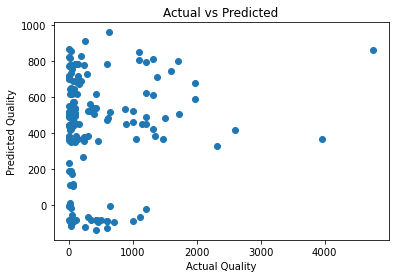

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [52]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.20220647324676977

In [53]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.20226007347016184

# Support Vector Regression

In [54]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: -17.37%

===============Test Result===============
Accuracy Score: -15.70%

 mean_absolute_error 359.49228601675

 mean_squared_error 534889.200884798


# DecisionTreeRegressor

In [55]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 98.90%

===============Test Result===============
Accuracy Score: -14.20%

 mean_absolute_error 364.20325549450547

 mean_squared_error 527933.8265165504


# AdaBoostRegressor

In [56]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 45.09%

===============Test Result===============
Accuracy Score: -7.42%

 mean_absolute_error 388.1950832236567

 mean_squared_error 496596.27727758


# GradientBoostingRegressor

In [57]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 76.24%

===============Test Result===============
Accuracy Score: 8.94%

 mean_absolute_error 316.30156083631385

 mean_squared_error 420984.9864402502


# RandomForestRegressor

In [58]:
rfr = GradientBoostingRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 76.24%

===============Test Result===============
Accuracy Score: 9.70%

 mean_absolute_error 318.2346713099413

 mean_squared_error 417476.04181917507


# Findings

- LinearRegression train accuracy score 19.02% and test accuracy score 20.23%
- Support Vector Regression train accuracy score -17.37% and test accuracy score -15.70%
- DecisionTreeRegressor train accuracy score 98.90% and test accuracy score -14.20%
- AdaBoostRegressor train accuracy score 45.09% and test accuracy score -7.42%
- GradientBoostingRegressor train accuracy score 76.24% and test accuracy score 8.94%
- RandomForestRegressor train accuracy score 76.24% and test accuracy score 9.70%

# Conclusion 

##### Selecting LinearRegression since the Accuracy score and test scores are greater and clsoe to each other.

### Saving the Model 

In [60]:
file = 'Global_Power_Plant.pickle'
pickle.dump(svr, open(file, 'wb'))

### Creating Classification Model

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

There is no Class imbalance

In [82]:
df = df.drop(['country', 'country_long', 'name', 'gppd_idnr', 'url', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'],axis=1)

Have Dropped those columns (Reason has been mentioned in prior data cleaning process)

In [83]:
df.isna().sum()

capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

NaN needs to be filled

In [84]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [85]:
df['geolocation_source'].mode()

0    WRI
dtype: object

In [86]:
df['geolocation_source'] = df['geolocation_source'].fillna('WRI')

In [87]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

Have filled all the NaN

In [88]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Encoded date from Str values to Int

In [89]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

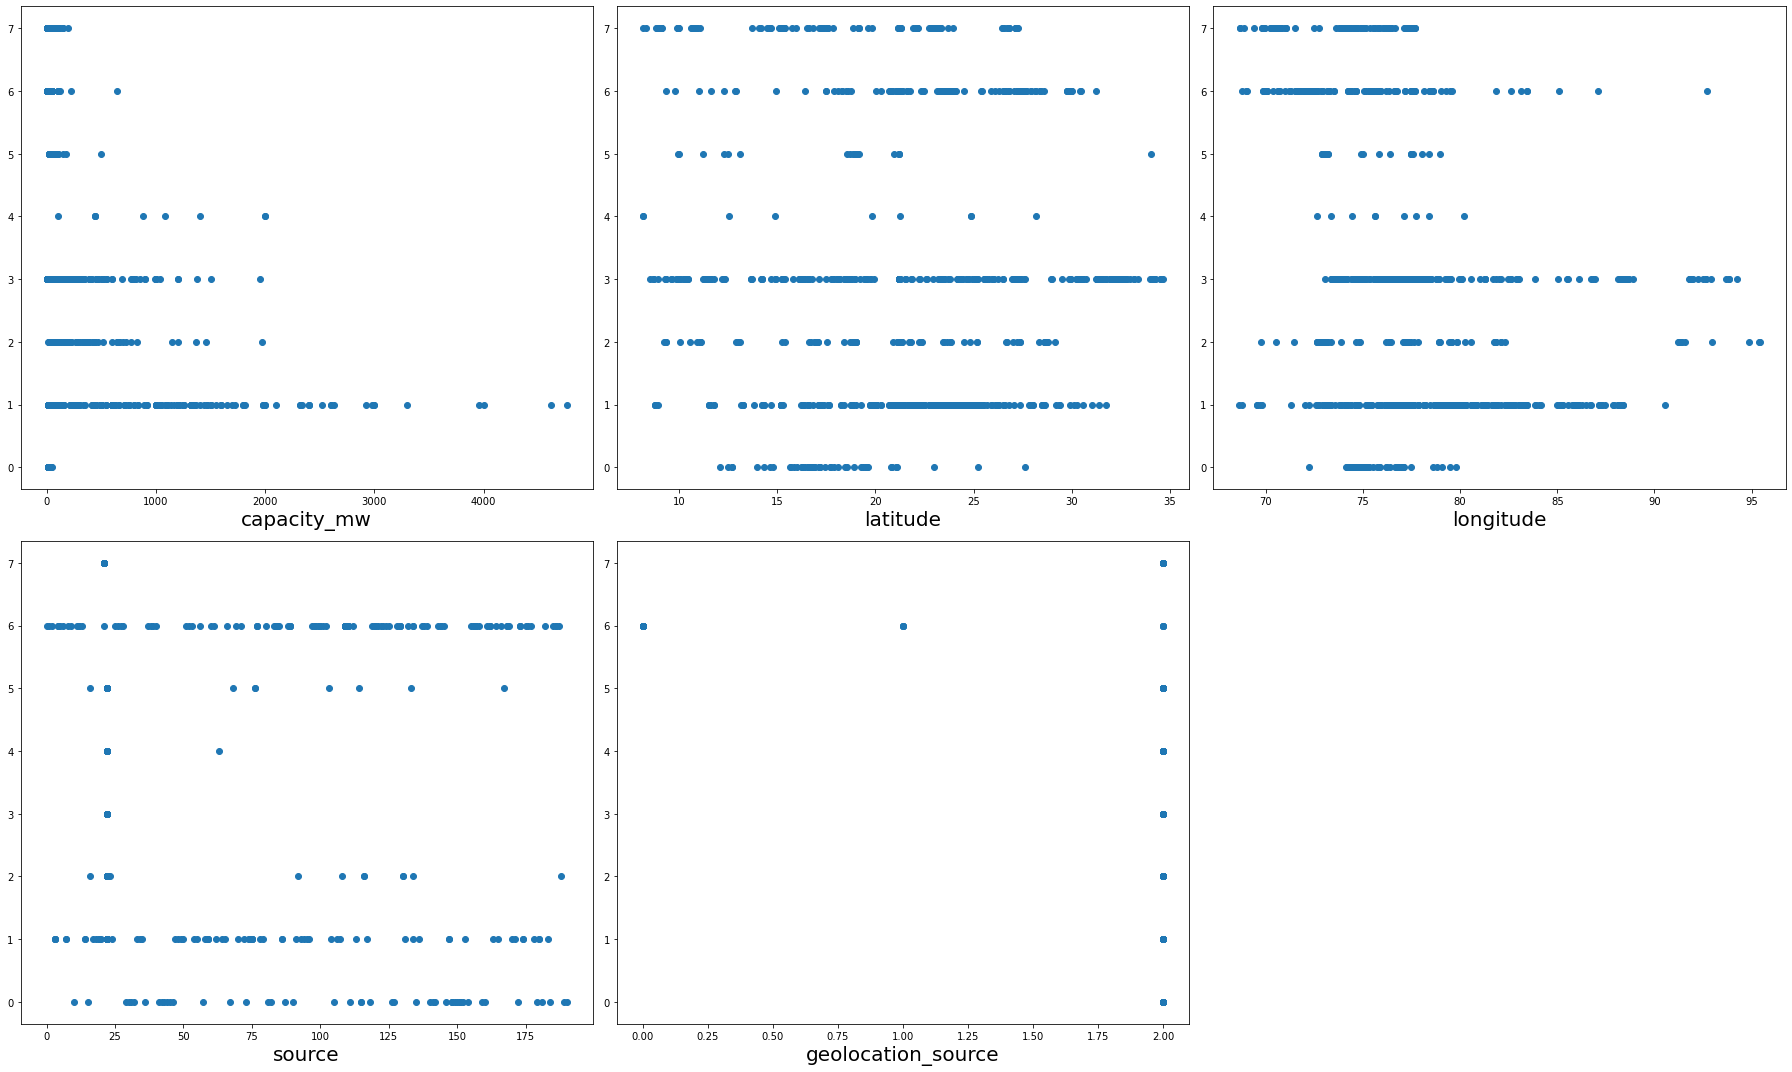

In [90]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

capacity_mw has a good relationship with label

In [91]:
df.drop('primary_fuel',axis=1).corrwith(df.primary_fuel)

capacity_mw          -0.380395
latitude             -0.010204
longitude            -0.347948
source                0.053613
geolocation_source   -0.483217
dtype: float64

latitude and source has low co-relation with label

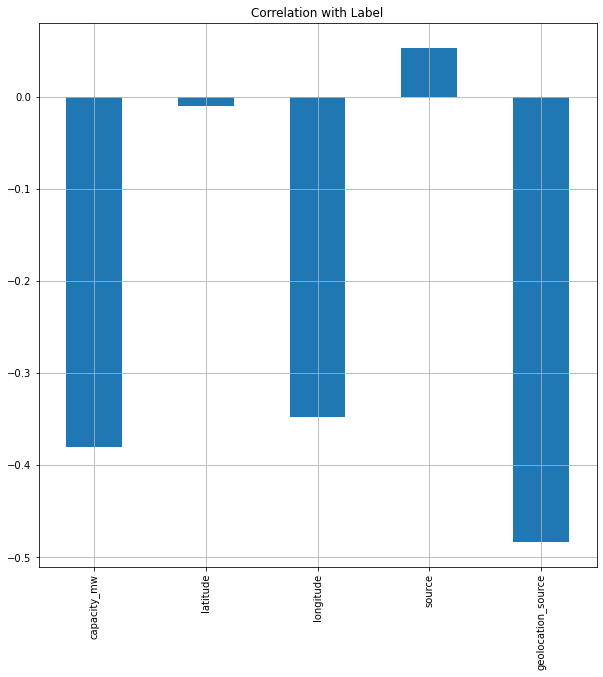

In [92]:
df.drop('primary_fuel',axis=1).corrwith(df.primary_fuel).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

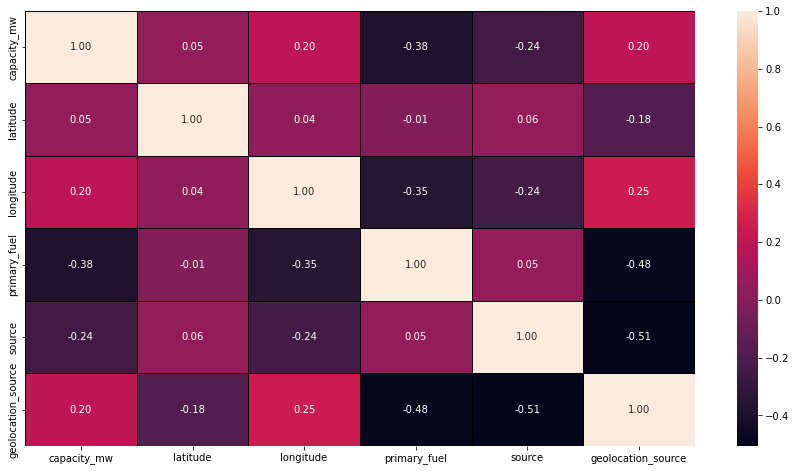

In [93]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

There is no multiple correlation problem exist

In [94]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

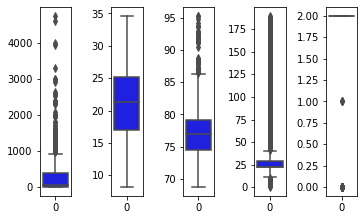

In [95]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in all the columns except latitude

In [96]:
old_data = (df.shape)[0]

In [97]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source'],
      dtype='object')

In [98]:
q1 = df['capacity_mw'].quantile(0.25)
q3 = df['capacity_mw'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['capacity_mw'] > (q3+1.5*iqr))
lower = np.where(df['capacity_mw'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Outliers removed from capacity_mw columns

In [99]:
q1 = df['longitude'].quantile(0.25)
q3 = df['longitude'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['longitude'] > (q3+1.5*iqr))
lower = np.where(df['longitude'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Outliers removed from longitude columns 

In [100]:
q1 = df['source'].quantile(0.25)
q3 = df['source'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['source'] > (q3+1.5*iqr))
lower = np.where(df['source'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Outliers removed from source columns 

In [101]:
new_data = (df.shape)[0]

In [102]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 242 no. of Data


In [103]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

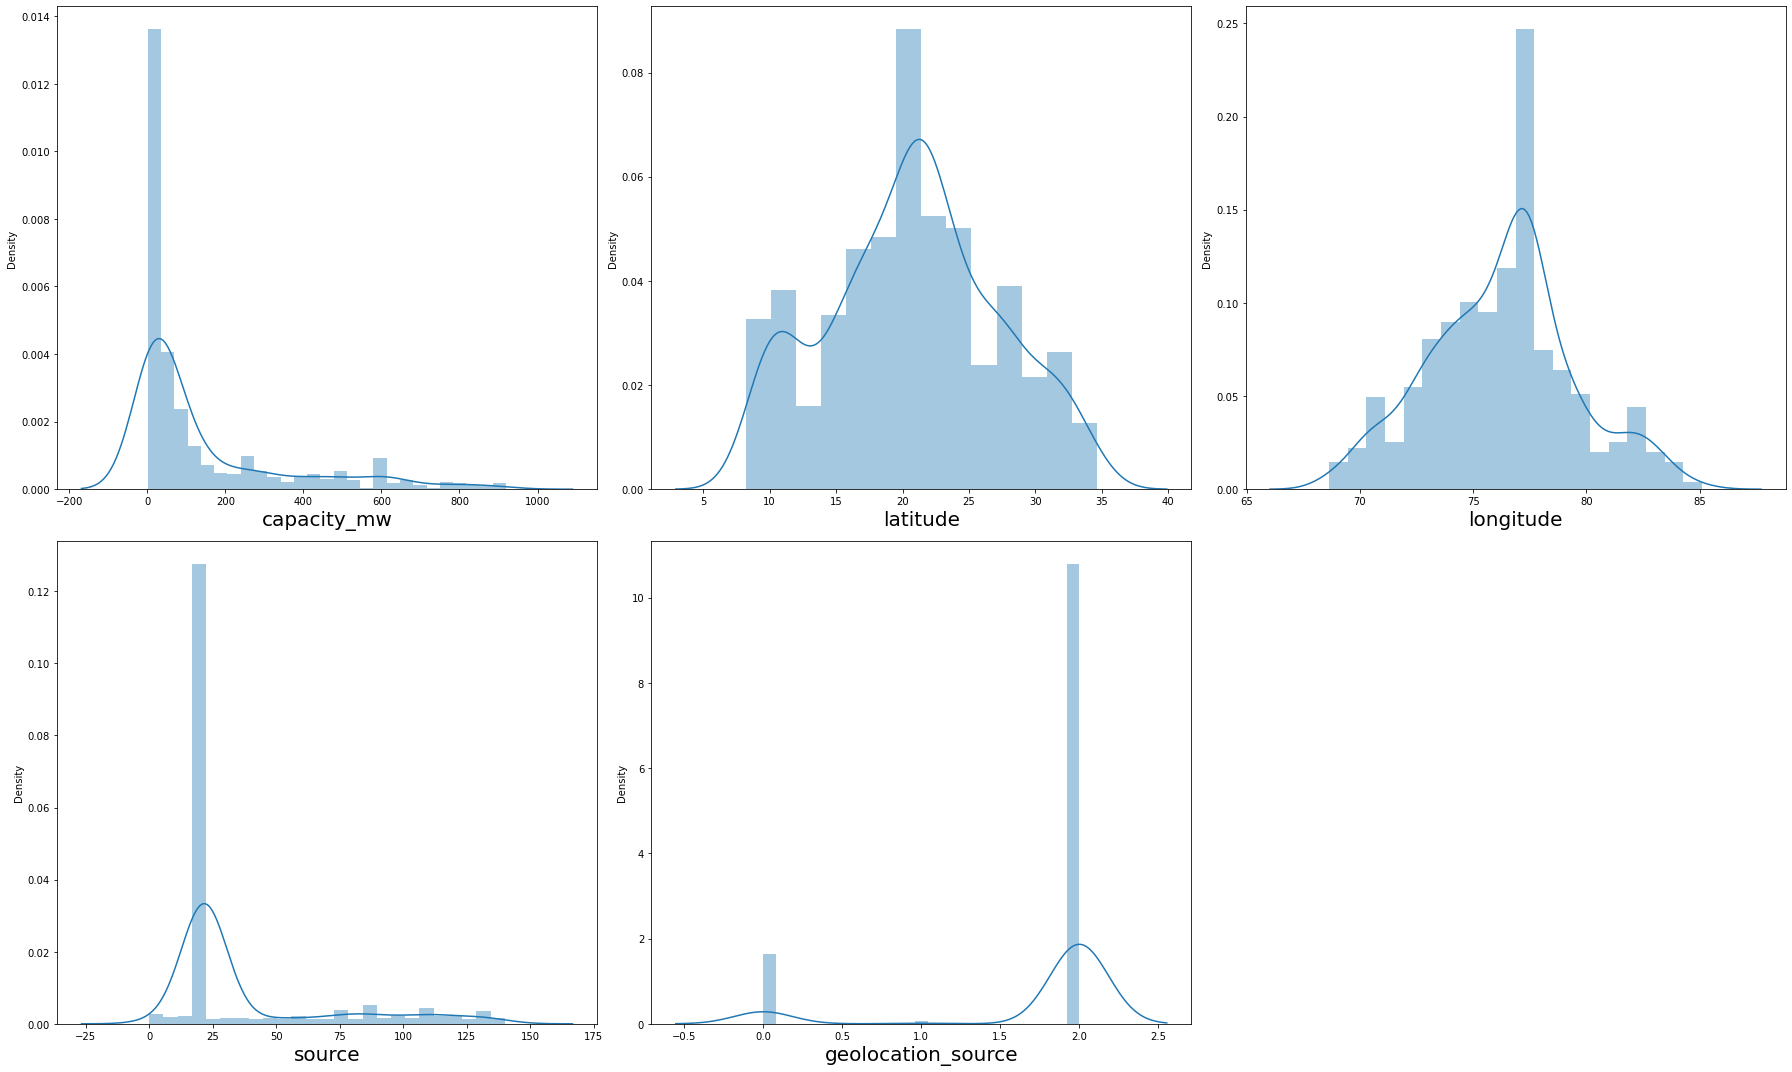

In [104]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Data have skewness hence using PowerTransformer technique to standardized the data

In [105]:
scaler = PowerTransformer(method='yeo-johnson')

In [106]:
df[['source','capacity_mw']] = scaler.fit_transform(df[['source','capacity_mw']].values)

In [107]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

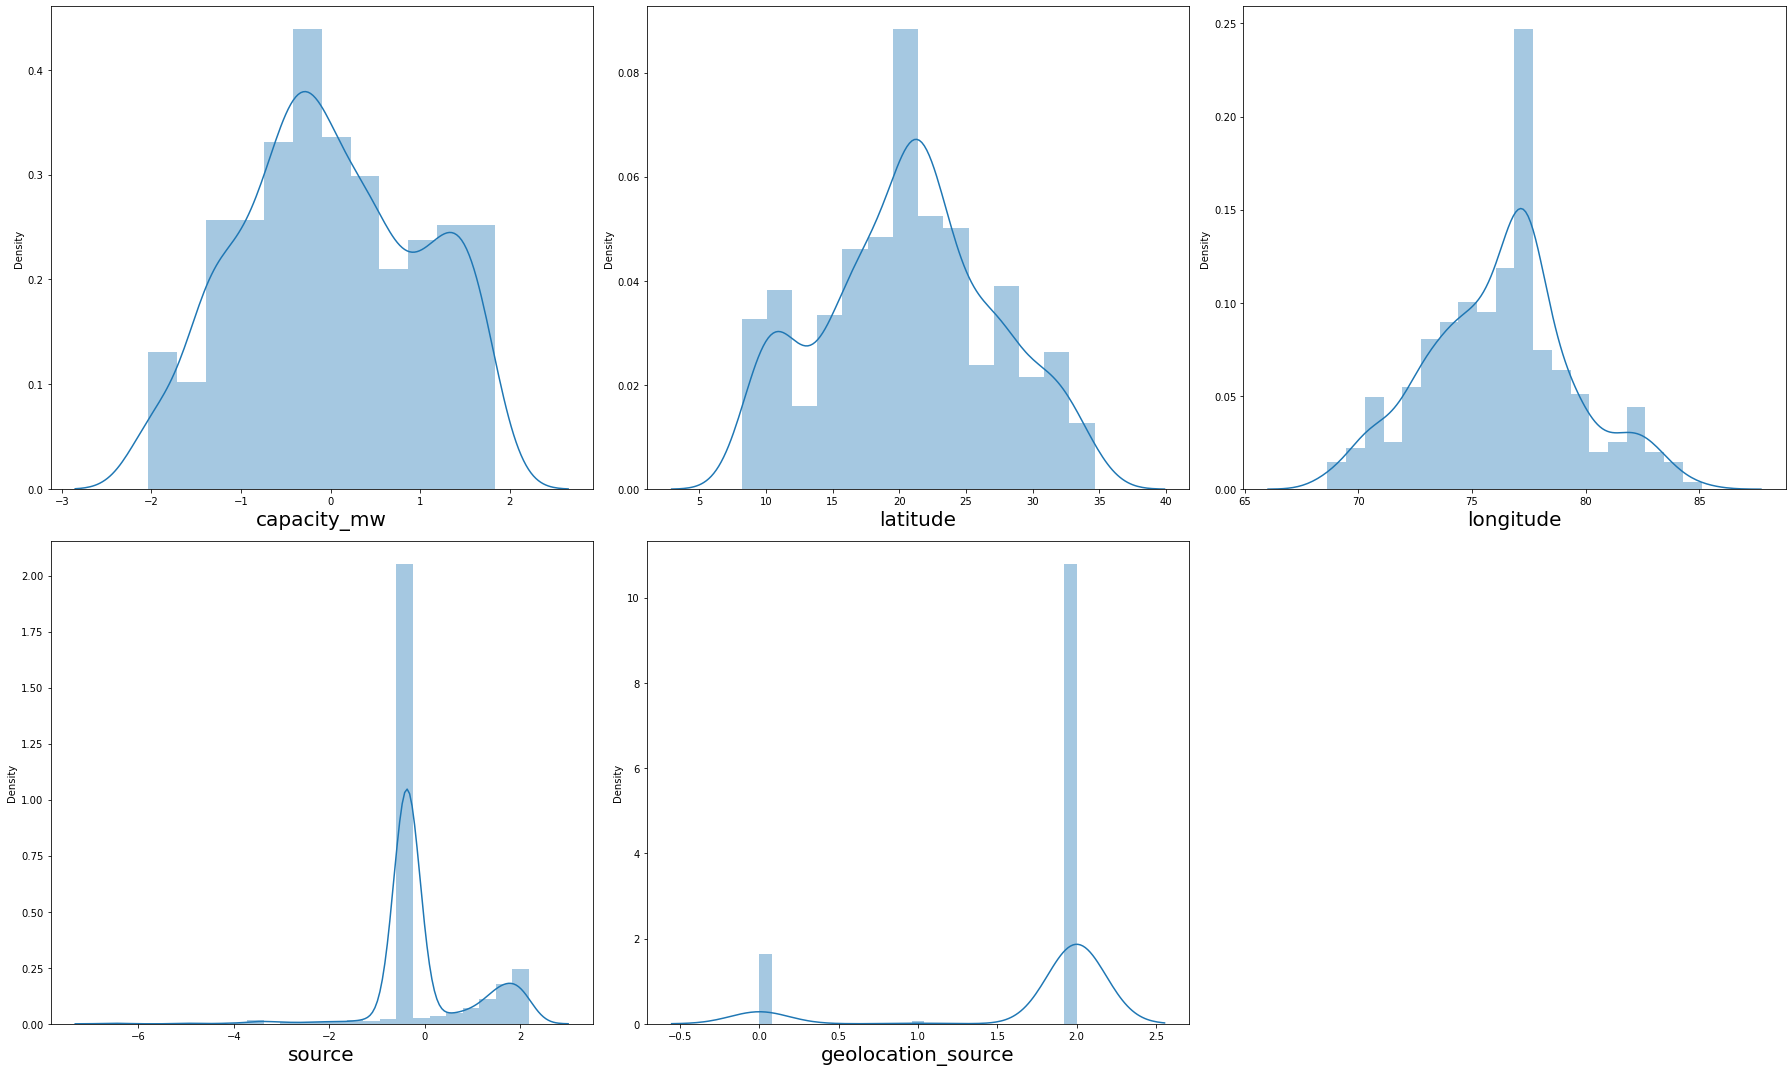

In [108]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed Skewness 

In [109]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaled the Data

# Model Buidling

# LogisticRegression

In [110]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.6347305389221557 Random_state 1
max_accuracy 0.6347305389221557 max_Random_state 1
accuracy 0.5389221556886228 Random_state 2
accuracy 0.6467065868263473 Random_state 3
max_accuracy 0.6467065868263473 max_Random_state 3
accuracy 0.6107784431137725 Random_state 4
accuracy 0.5868263473053892 Random_state 5
accuracy 0.6347305389221557 Random_state 6
accuracy 0.5389221556886228 Random_state 7
accuracy 0.5748502994011976 Random_state 8
accuracy 0.6047904191616766 Random_state 9
accuracy 0.6167664670658682 Random_state 10
accuracy 0.5748502994011976 Random_state 11
accuracy 0.5748502994011976 Random_state 12
accuracy 0.5808383233532934 Random_state 13
accuracy 0.5508982035928144 Random_state 14
accuracy 0.6407185628742516 Random_state 15
accuracy 0.6407185628742516 Random_state 16
accuracy 0.5808383233532934 Random_state 17
accuracy 0.6227544910179641 Random_state 18
accuracy 0.6467065868263473 Random_state 19
accuracy 0.5568862275449101 Random_state 20
accuracy 0.5449101796407185

In [111]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 185)

In [112]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [113]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 60.44%

===============Test Result===============
Accuracy Score: 67.07%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        10
         1.0       0.71      0.47      0.57        36
         2.0       0.20      0.09      0.13        11
         3.0       0.60      0.82      0.69        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.95      0.98        22
         7.0       0.68      0.77      0.72        30

    accuracy                           0.67       167
   macro avg       0.48      0.45      0.45       167
weighted avg       0.65      0.67      0.65       167

Cross Validation Score-  0.6


# RandomForestClassifier

In [114]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 83.23%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        10
         1.0       0.74      0.72      0.73        36
         2.0       0.36      0.36      0.36        11
         3.0       0.84      0.89      0.87        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      1.00      1.00        22
         7.0       1.00      1.00      1.00        30

    accuracy                           0.83       167
   macro avg       0.59      0.60      0.60       167
weighted avg       0.82      0.83      0.83       167

Cross Validation Score-  0.8300751879699249


# DecisionTreeClassifier

In [115]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 77.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        10
         1.0       0.71      0.67      0.69        36
         2.0       0.33      0.45      0.38        11
         3.0       0.82      0.76      0.79        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.88      1.00      0.94        22
         7.0       1.00      1.00      1.00        30

    accuracy                           0.77       167
   macro avg       0.59      0.56      0.57       167
weighted avg       0.80      0.77      0.78       167

Cross Validation Score-  0.7789473684210526


# GradientBoostingClassifier

In [116]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.80%

===============Test Result===============
Accuracy Score: 85.03%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84        10
         1.0       0.77      0.75      0.76        36
         2.0       0.60      0.55      0.57        11
         3.0       0.84      0.87      0.86        55
         4.0       0.00      0.00      0.00         1
         5.0       0.50      0.50      0.50         2
         6.0       0.96      1.00      0.98        22
         7.0       1.00      1.00      1.00        30

    accuracy                           0.85       167
   macro avg       0.69      0.68      0.69       167
weighted avg       0.85      0.85      0.85       167

Cross Validation Score-  0.8195488721804512


# Support Vector Classifier

In [117]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 67.07%

===============Test Result===============
Accuracy Score: 62.87%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.57      0.56      0.56        36
         2.0       0.00      0.00      0.00        11
         3.0       0.56      0.80      0.66        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.95      0.98        22
         7.0       0.74      0.47      0.57        30

    accuracy                           0.63       167
   macro avg       0.44      0.42      0.43       167
weighted avg       0.61      0.63      0.61       167

Cross Validation Score-  0.6345864661654136


# KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 80.52%

===============Test Result===============
Accuracy Score: 68.26%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.59      0.64      0.61        36
         2.0       0.50      0.36      0.42        11
         3.0       0.65      0.71      0.68        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.95      0.95      0.95        22
         7.0       0.71      0.67      0.69        30

    accuracy                           0.68       167
   macro avg       0.52      0.50      0.51       167
weighted avg       0.67      0.68      0.68       167

Cross Validation Score-  0.6781954887218046


# Findings

- LogisticsRegression - Cross Validation Score is 60%, Accuracy Score of Train Result is 60.44% and Test Result is 67.07%
- RandomForestClassifier - Cross Validation Score is 83.00%, Accuracy Score of Train Result is 100% and Test Result is 83.23%
- DecisionTreeClassifier - Cross Validation Score is 77.89%, Accuracy Score of Train Result is 100% and Test Result is 77.25%
- GradientBoostingClassifier - Cross Validation Score is 81.95%, Accuracy Score of Train Result is 99.80% and Test Result is 85.03%
- Support Vector Classifier - Cross Validation Score is 63.45%, Accuracy Score of Train Result is 67.07% and Test Result is 62.87%
- KNeighborsClassifier - Cross Validation Score is 67.81%, Accuracy Score of Train Result is 80.52% and Test Result is 68.26%

##### Choosing SVC Model since the Accuracy is good and train and test score is close to each other

# Hyper Parameter Tuning

In [119]:
grid_param = {
    'kernel': ['poly', 'rbf'],
    'C': range(1,10),
    'random_state': range(1,10),
    'max_iter':range(50,100),
}

Selecting Parameters for Hyper Parameter Tuning

In [120]:
grid_search = GridSearchCV(estimator=svc,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

Searching the best grid for the model

In [121]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 10), 'kernel': ['poly', 'rbf'],
                         'max_iter': range(50, 100),
                         'random_state': range(1, 10)})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [122]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 9, 'kernel': 'rbf', 'max_iter': 70, 'random_state': 1}


In [123]:
svc = SVC(C= 9, kernel='rbf', max_iter=70, random_state=1)
svc.fit(x_train,y_train)

SVC(C=9, max_iter=70, random_state=1)

Applying best parameters to train the model

In [124]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [125]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 76.51%
Test Accuracy Score: 68.26%
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.59      0.61      0.60        36
         2.0       0.33      0.27      0.30        11
         3.0       0.63      0.75      0.68        55
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.95      0.98        22
         7.0       0.80      0.67      0.73        30

    accuracy                           0.68       167
   macro avg       0.51      0.49      0.50       167
weighted avg       0.68      0.68      0.68       167



- Previous Accuracy Score for Support Vector Classifier - 62.87%
- New Accuracy Score for Support Vector Classifier - 68.26% 

###### Cannot show the AUR ROC Curve since the data is not binary 

In [126]:
file = 'Global_Power_Plant_Classification.pickle'
pickle.dump(svc, open(file, 'wb'))